## ***Summary of the notebook***

*In this notebook, I have cleaned the dataset.*

***Index***
1. Import libraries and data
2. Handle null values
3. Check and correct data types
4. Handling Outliers

## **<ins>Import libraries and data</ins>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects/Flight price prediction - 3/data.xlsx')
data.columns = data.columns.str.lower()
data.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## **<ins>Check null values</ins>**

In [3]:
data.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

There are 2 null values. 1 each in `route` and `rotal_stops`. Let's print the row having null value in `route`

In [4]:
_ = data['route'].isnull()
data[_]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


This row has 2 null values. One each in `route` and `total_stops`. We will delete this row as we do not lose much data.

In [5]:
data.drop(index = 9039, inplace = True)
data.isnull().sum().sum()

0

## **<ins>Check data types<ins>**

In [6]:
data.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
dtype: object

All features except features related to date and time have correct data types. So there is no need to change any dtype here

## **<ins>Check outliers<ins>**

### **1) `price`**

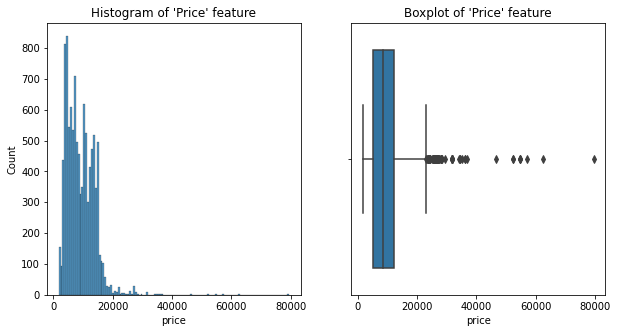

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2)
fig.set_size_inches(10,5)
sns.histplot(data['price'], ax = ax1)
sns.boxplot(data['price'], ax = ax2)
ax1.set_title("Histogram of 'Price' feature")
ax2.set_title("Boxplot of 'Price' feature")
plt.show()

There are outliers in `price`. We will remove them

In [8]:
data['price'].sort_values(ascending = False).head(15)

2924     79512
5372     62427
10364    57209
5439     54826
2618     54826
1478     54826
9715     52285
657      52229
7351     46490
396      36983
2099     36235
5719     36235
2693     35185
8598     34608
7617     34503
Name: price, dtype: int64

We will remove rows with `price` > 40000

In [9]:
data = data[data['price'] < 40000]

### **2) `airline`**

In [10]:
data['airline'].value_counts()

Jet Airways                          3846
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

Last 3 airline have very few examples compared to other airlines. We will remove these to make it more balanced dataset

In [11]:
mask1 = data['airline'] != 'Trujet'
mask2 = data['airline'] != 'Multiple carriers Premium economy'
mask3 = data['airline'] != 'Vistara Premium economy'
data = data[mask1 & mask2 & mask3]

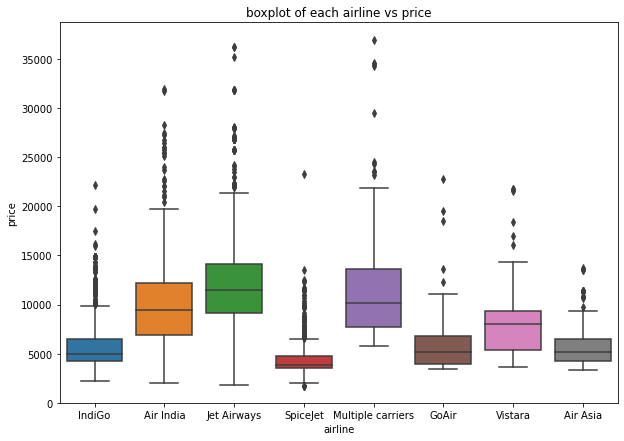

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = 'airline', y = 'price')
plt.title('boxplot of each airline vs price');

'SpiceJet' has an outier. Let's remove it.

In [13]:
print(data[(data['airline'] == 'SpiceJet') & (data['price']>20000)].index)

Int64Index([5136], dtype='int64')


In [14]:
data.drop(index = 5136, inplace = True)

### **3) `source`**

In [15]:
data['source'].value_counts()

Delhi       4521
Kolkata     2871
Banglore    2187
Mumbai       696
Chennai      380
Name: source, dtype: int64

data is clean here

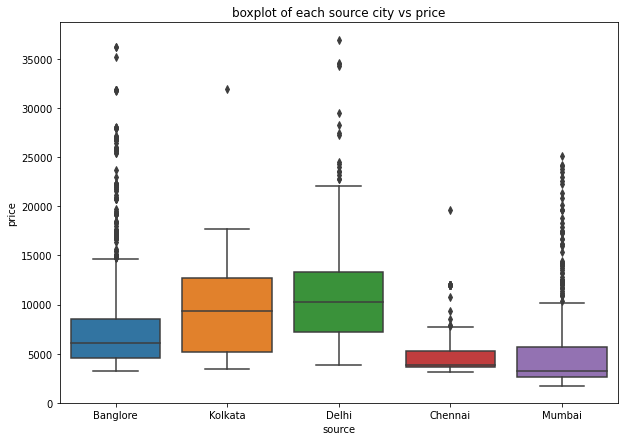

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = 'source', y = 'price')
plt.title('boxplot of each source city vs price');

'Kolkata' and 'Chennai' have 1 outlier each. We will remove them

In [17]:
print(data[(data['source'] == 'Kolkata') & (data['price']>30000)].index)
print(data[(data['source'] == 'Chennai') & (data['price']>15000)].index)

Int64Index([10052], dtype='int64')
Int64Index([268], dtype='int64')


In [18]:
data.drop(index = [10052, 268], inplace = True)

### **4) `destination`**

In [19]:
data['destination'].value_counts()

Cochin       4521
Banglore     2870
Delhi        1264
New Delhi     923
Hyderabad     696
Kolkata       379
Name: destination, dtype: int64

data is clean here

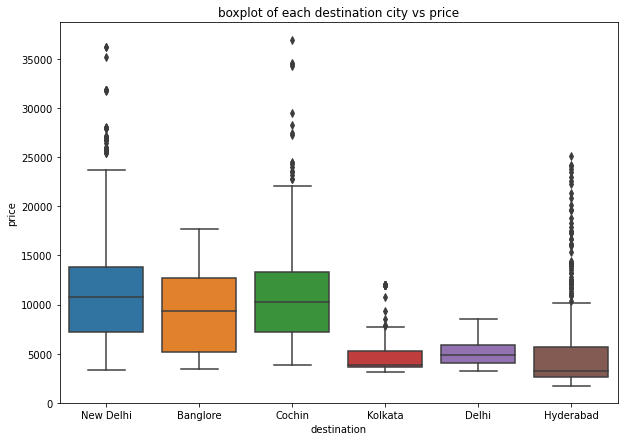

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = 'destination', y = 'price')
plt.title('boxplot of each destination city vs price');

'New Delhi' and 'Cochin' have some outliers. Let's remove them

In [21]:
print(data[(data['destination'] == 'New Delhi') & (data['price']>33000)].index)
print(data[(data['destination'] == 'Cochin') & (data['price']>32000)].index)

Int64Index([2099, 2693, 5719], dtype='int64')
Int64Index([396, 6991, 7617, 8598], dtype='int64')


In [22]:
data.drop(index = [2099, 2693, 5719, 2099, 2693, 5719], inplace = True)

### **5) `total_stops`**

In [23]:
data['total_stops'].value_counts()

1 stop      5600
non-stop    3486
2 stops     1518
3 stops       45
4 stops        1
Name: total_stops, dtype: int64

'3 stops' and '4 stops' have very few examples compared to other options. Let's remove them to make it more balanced dataset

In [24]:
mask1 = data['total_stops'] != '4 stops'
mask2 = data['total_stops'] != '3 stops'
data = data[mask1 & mask2]

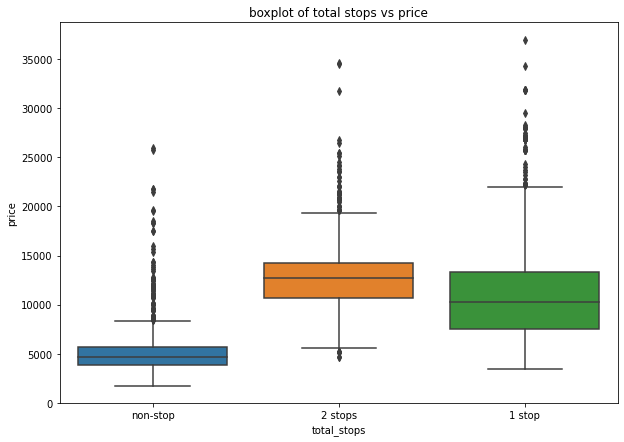

In [25]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = 'total_stops', y = 'price')
plt.title('boxplot of total stops vs price');

'2 stops' has outliers. Let's remove them

In [26]:
print(data[(data['total_stops'] == '2 stops') & (data['price']>30000)].index)

Int64Index([1629, 7617, 8598], dtype='int64')


In [27]:
data.drop(index = [1629, 7617, 8598], inplace = True)

### **6) `date_of_journey`**

Let's first convert this to date type and create new features based on it.

In [28]:
data['date_of_journey'] = pd.to_datetime(data['date_of_journey'], format='%d/%m/%Y')
data['doj_month'] = data['date_of_journey'].dt.month
data['doj_day'] = data['date_of_journey'].dt.day
data['doj_dayofweek'] = data['date_of_journey'].dt.dayofweek
data['doj_weekofyear'] = data['date_of_journey'].dt.isocalendar().week

In [29]:
print(f"months present in data : {data['doj_month'].value_counts().index.sort_values()}")
print(f"day of the months present in data : {data['doj_day'].value_counts().index.sort_values()}")
print(f"day of the week present in data : {data['doj_dayofweek'].value_counts().index.sort_values()}")

months present in data : Int64Index([3, 4, 5, 6], dtype='int64')
day of the months present in data : Int64Index([1, 3, 6, 9, 12, 15, 18, 21, 24, 27], dtype='int64')
day of the week present in data : Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Here we observe that the 
1. Data only for the months of March, April, May and June of 2019. 
2. Oddly, only a few days of the month in dataset

Future scope for this project would be collect more data and rebuild the model

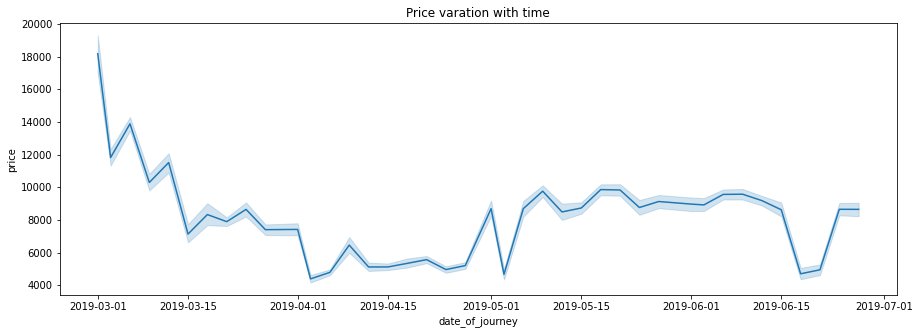

In [30]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = data, x = 'date_of_journey', y = 'price');
plt.title('Price varation with time');

Pattern observed:   
1. Price for 'March' consistently decrease 
2. Avg Price for 'April' is lowest
3. Large dip in Price at the starting of 'May
4. Large dip in Price in 2nd half of 'June'
5. No obvious outliers. We have to dig deeper to get the outliers

### **7) `doj_month`**

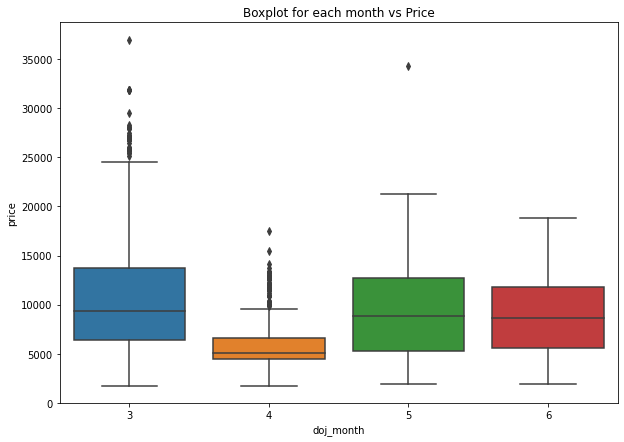

In [31]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = 'doj_month', y = 'price')
plt.title('Boxplot for each month vs Price');

'May' has an outlier. We will remove that.

In [32]:
print(data[(data['doj_month'] == 5) & (data['price']>30000)].index)

Int64Index([6991], dtype='int64')


In [33]:
data.drop(index = [6991], inplace = True)

### **8) `doj_day`**

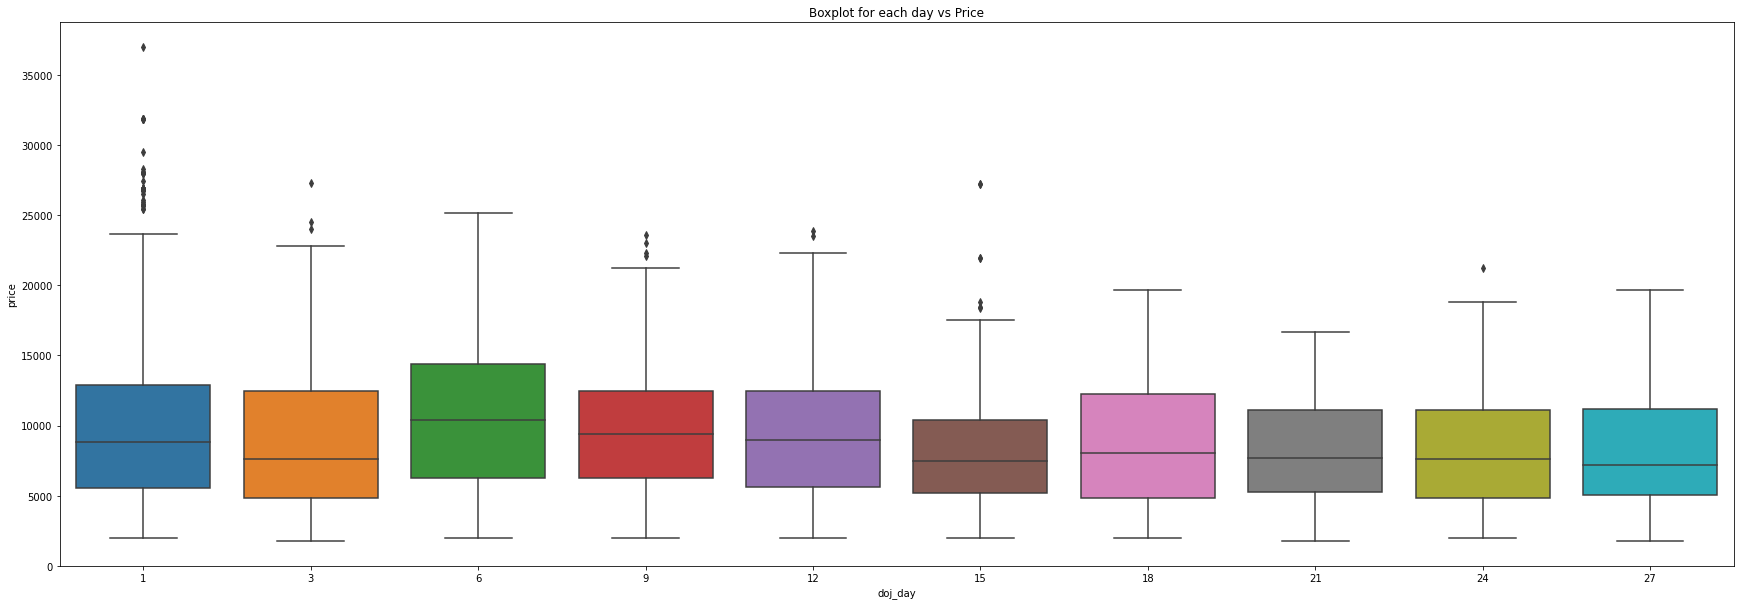

In [34]:
plt.figure(figsize=(30, 10))
sns.boxplot(data = data, x = 'doj_day', y = 'price')
plt.title('Boxplot for each day vs Price');

'1' and '15' have outliers. We will remove that.

In [35]:
print(data[(data['doj_day'] == 1) & (data['price']>35000)].index)
print(data[(data['doj_day'] == 15) & (data['price']>25000)].index)

Int64Index([396], dtype='int64')
Int64Index([628, 2108], dtype='int64')


In [36]:
data.drop(index = [396, 628, 2108], inplace = True)

### **9) doj_dayofweek**

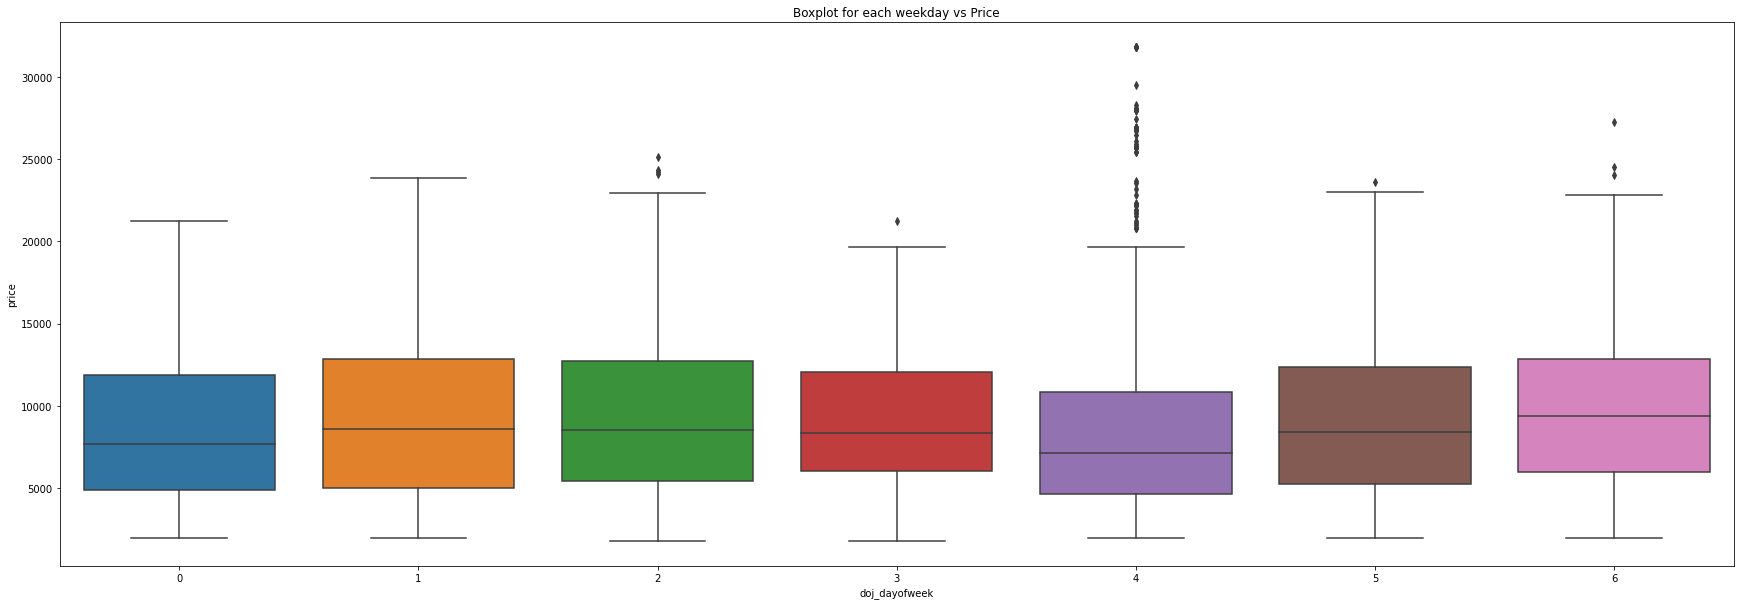

In [37]:
plt.figure(figsize=(30, 10))
sns.boxplot(data = data, x = 'doj_dayofweek', y = 'price')
plt.title('Boxplot for each weekday vs Price');

### **10) dep_time**     
First we extract the hours and minutes from this column and create new features

In [38]:
# Converting departure time into hours and minutes
data['dep_hour'] = data['dep_time'].apply(lambda x: re.findall(r'(\d+):\d+', x)[0]).astype(int)
data['dep_min'] = data['dep_time'].apply(lambda x: re.findall(r'\d+:(\d+)', x)[0]).astype(int)

## **<ins>Delete features</ins>**   

1. `date_of_journey` & `dep_time` : We have created necessary features from them and they are no longer required.
2. `route`, `additional_info`, `arrival_time`, `duration` : To keep the user input more intuitive, we are omitting these features

In [39]:
data.drop(['date_of_journey', 'dep_time', 'route', 'additional_info', 'arrival_time', 'duration'], axis = 1, inplace = True)

## **<ins>Final data</ins>**

In [40]:
data.head()

,airline,source,destination,total_stops,price,doj_month,doj_day,doj_dayofweek,doj_weekofyear,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,6,12,22,20
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,2,18,5,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,6,23,9,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,6,19,18,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,4,9,16,50


___